<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/Beam_Search_for_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Go to runtime> run all
- on last cell change n and run it several times. This will give you an idea of how changing N will effect the best paths. 

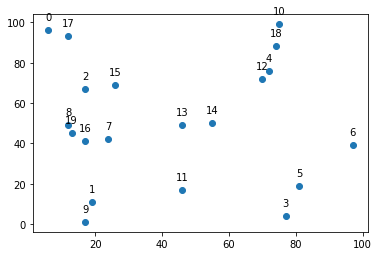

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


cities = np.around(np.random.rand(20,2) * 1000 % 99)
x,y = cities.T
plt.scatter(x,y)
for i,(x,y) in enumerate(zip(x,y)):

    label = f"{i}"

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# This is a base line 
- I used a greedy algorithm as a baseline. This heuristic uses the closest items. It takes all of the greedy algorithms and gives the best path in general.

In [ ]:
import numpy as np

def algorithm(cities):
	best_order = []
	best_length = float('inf')
	for i_start, start in enumerate(cities):
		order = [i_start]
		length = 0
		i_next, next, dist = get_closest(start, cities, order)
		length += dist
		order.append(i_next)
		while len(order) < cities.shape[0]:
			i_next, next, dist = get_closest(next, cities, order)
			length += dist
			order.append(i_next)
		if length < best_length:
			best_length = length
			best_order = order			
	return best_order, best_length

def get_closest(city, cities, visited):
	best_distance = float('inf')
	for i, c in enumerate(cities):
		if i not in visited:
			distance = dist_squared(city, c)
			if distance < best_distance:
				closest_city = c
				i_closest_city = i
				best_distance = distance
	return i_closest_city, closest_city, best_distance

def dist_squared(c1, c2):
	t1 = c2[0] - c1[0]
	t2 = c2[1] - c1[1]
	return t1**2 + t2**2

In [ ]:
algorithm(cities)

([0, 17, 2, 15, 8, 19, 16, 7, 13, 14, 12, 4, 18, 10, 6, 5, 3, 11, 1, 9],
 10120.0)

# Beam Search

This takes the top n city combinations with minimum distance. That's the heuritstic it uses. I used the greedy search as a baseline. This still doesn't give the optimal path obviously, as the greedy algorithm does better. 
The beam search algorithm will be forced to start with smaller clusters and as the path gets larger, the effect that smaller clusters have on the algorithm will be less. 
The algorithm is space efficient to a degree. Only the top n paths at that particular iteration are necessary.The baseline needs all paths from any start to any end this means that an the number of point squared will need to be in memory. It is not a complete search obviously, but it does give a good estimate.

In [ ]:
n = 6
arr = []
for i in range(len(cities)): 
  for j in range(len(cities)): 
    if dist_squared(cities[i],cities[j]) != 0:
      arr.append(([i, j], dist_squared(cities[i],cities[j]))) 
arr.sort(key = lambda x:x[-1])
top_arr = arr[:n]


for _ in range(len(cities)-2):
    visited =[]
    next_arr = []
    for visited,distance in top_arr:
          current_city = visited[-1]
          for j in range(len(cities)):
            total_distance = 0
            if j not in visited:
              total_distance = distance + dist_squared(cities[current_city],cities[j])
              np_visited = np.array(visited)
              np_visited = np.append(np_visited,j)
              next_arr.append((np_visited, total_distance))
          next_arr.sort(key = lambda x:x[-1])
          top_arr = next_arr[:n]
top_arr

[(array([ 8, 19, 16,  7, 13, 14, 12,  4, 10, 18, 15, 17,  0,  2,  1,  9, 11,
          3,  5,  6]), 12915.0),
 (array([ 8, 19, 16,  7, 13, 14, 12,  4, 10, 18, 15, 17,  0,  2,  1,  9, 11,
          5,  3,  6]), 13983.0),
 (array([ 8, 19, 16,  7, 13, 14, 12,  4, 10, 18, 15, 17,  0,  2,  1,  9, 11,
          3,  6,  5]), 14299.0),
 (array([ 8, 19, 16,  7, 13, 14, 12,  4, 10, 18, 15, 17,  0,  2,  1,  9, 11,
          5,  6,  3]), 14398.0),
 (array([ 8, 19, 16,  7, 13, 14, 12,  4, 10, 18, 15, 17,  0,  2,  1, 11,  3,
          6,  5,  9]), 18283.0),
 (array([ 8, 19, 16,  7, 13, 14, 12,  4, 10, 18, 15, 17,  0,  2,  1, 11,  3,
          5,  6,  9]), 20323.0)]